# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# define the constants for processing
image_with_faces_path = '../data/scrubs/scrubs.png'
image_from_comic_con_path = '../data/comiccon.png'

### Step 1

Load an image (any image that contains faces).

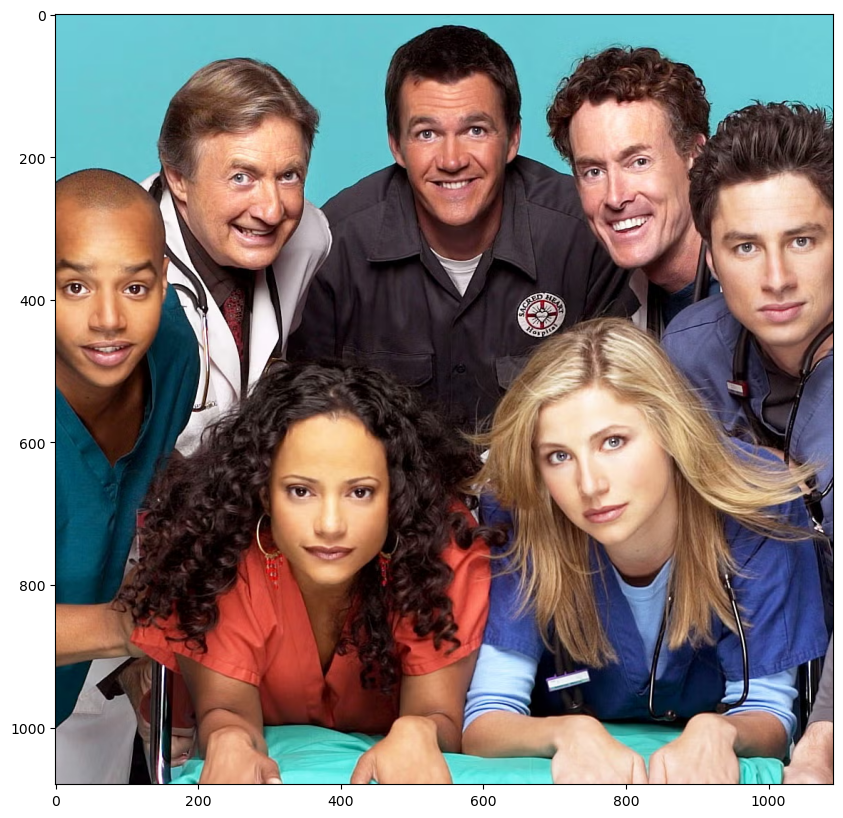

In [6]:
image_with_faces = cv2.imread(image_with_faces_path)
image_with_faces = cv2.cvtColor(image_with_faces, cv2.COLOR_BGR2RGB)
image_with_faces_gray = cv2.cvtColor(image_with_faces, cv2.COLOR_RGB2GRAY)
plt.imshow(image_with_faces)

### Step 2

Load the dlib face predictor.

In [7]:
import dlib
# Let's load the detector
detector = dlib.get_frontal_face_detector()

Number of detected faces: 7
rectangles[[(201, 160) (386, 345)], [(304, 614) (489, 800)], [(476, 133) (631, 288)], [(696, 139) (882, 325)], [(675, 552) (861, 738)], [(924, 288) (1078, 442)], [(-47, 325) (159, 511)]]


### Step 3

Run the predictor on your image.

In [8]:
# Detect faces, see http://dlib.net/face_detector.py.html
# 1 --> upsampling factor
rects = detector(image_with_faces_gray, 1)

print('Number of detected faces:', len(rects))
print(rects)

Number of detected faces: 7
rectangles[[(201, 160) (386, 345)], [(304, 614) (489, 800)], [(476, 133) (631, 288)], [(696, 139) (882, 325)], [(675, 552) (861, 738)], [(924, 288) (1078, 442)], [(-47, 325) (159, 511)]]


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

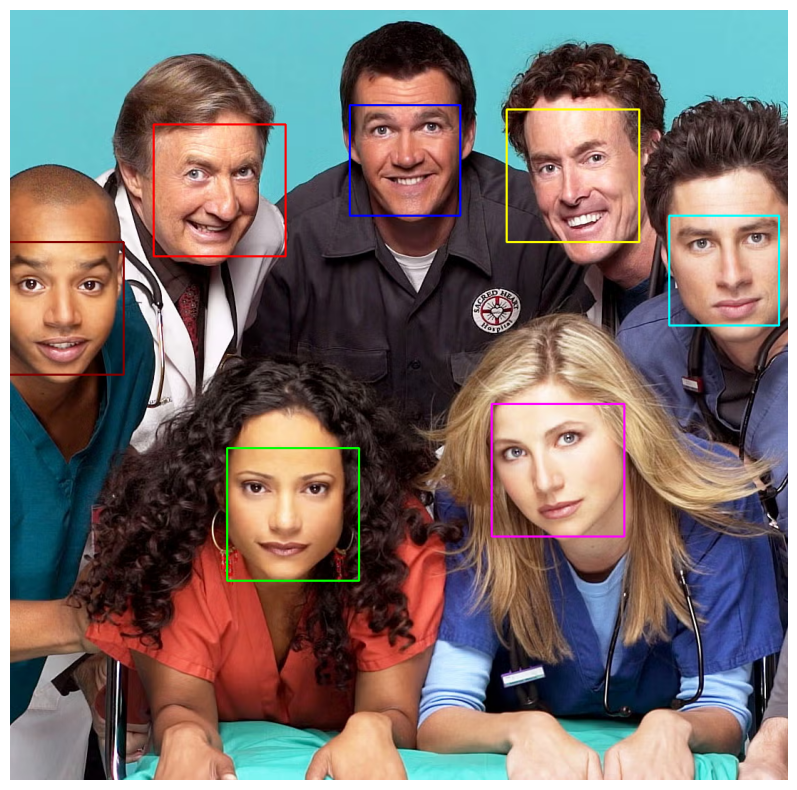

In [9]:
# Define a list of colors for different faces
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),
          (255, 0, 255), (0, 255, 255), (128, 0, 0), (0, 128, 0)]

# Create a copy of the image to draw on
image_with_boxes = image_with_faces.copy()

# Draw rectangles around detected faces
for idx, rect in enumerate(rects):
    # Get coordinates
    x1, y1 = rect.left(), rect.top()
    x2, y2 = rect.right(), rect.bottom()

    # Draw rectangle with different color for each face
    color = colors[idx % len(colors)]  # Cycle through colors if more faces than colors
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, 2)

# Display the result
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()


### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

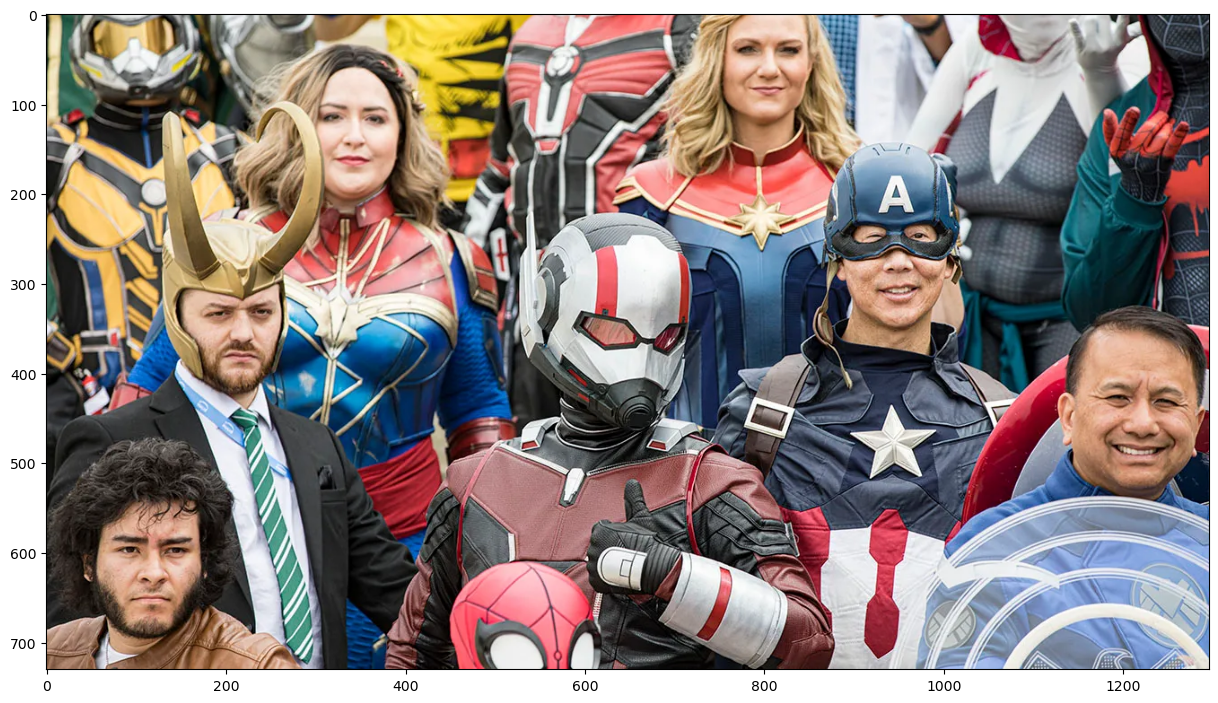

In [14]:
image_from_comic_con = cv2.imread(image_from_comic_con_path)
image_from_comic_con = cv2.cvtColor(image_from_comic_con, cv2.COLOR_BGR2RGB)
image_from_comic_con_gray = cv2.cvtColor(image_from_comic_con, cv2.COLOR_RGB2GRAY)
plt.imshow(image_from_comic_con)


Number of detected faces: 6
rectangles[[(748, 8) (856, 116)], [(163, 307) (270, 414)], [(53, 555) (182, 684)], [(282, 82) (411, 211)], [(1156, 397) (1285, 526)], [(884, 211) (1013, 340)]]


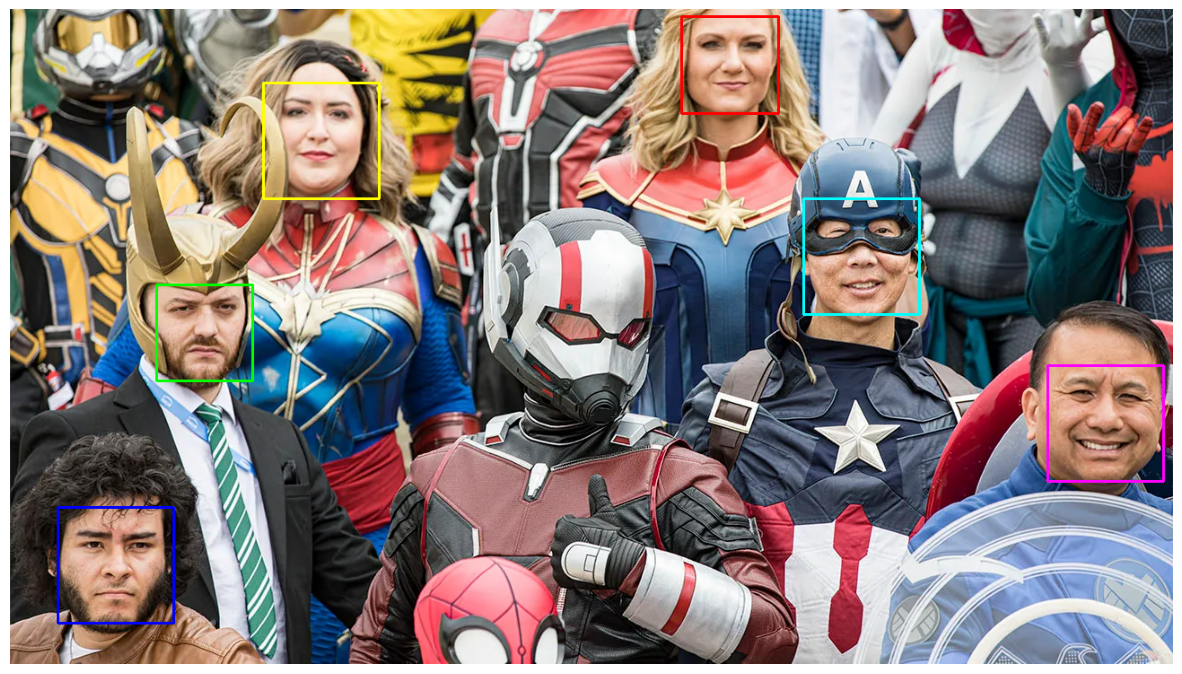

In [17]:
rects = detector(image_from_comic_con_gray, 1)

print('Number of detected faces:', len(rects))
print(rects)

# Create a copy of the image to draw on
image_with_boxes = image_from_comic_con.copy()

# Draw rectangles around detected faces
for idx, rect in enumerate(rects):
    # Get coordinates
    x1, y1 = rect.left(), rect.top()
    x2, y2 = rect.right(), rect.bottom()

    # Draw rectangle with different color for each face
    color = colors[idx % len(colors)]  # Cycle through colors if more faces than colors
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, 2)

# Display the result
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()

# well spidey and captain america were not detected